In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
import pandas as pd

In [2]:
mav_df= pd.read_excel('Downloads/mavoix_ml_sample_dataset.xlsx')

In [3]:
mav_df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


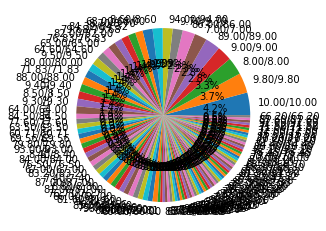

In [5]:
mav_df['Performance_10'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [13]:
mav_df.dtypes

def Encode(mav_df):
    for column in mav_df.columns[~mav_df.columns.isin([])]:
        mav_df[column] = mav_df[column].factorize()[0]
    return mav_df

In [14]:
mav = Encode(mav_df.copy())

In [15]:

print(mav.isnull().sum())
print(mav.dtypes)

Application_ID                0
Current City                  0
Python (out of 3)             0
R Programming (out of 3)      0
Deep Learning (out of 3)      0
PHP (out of 3)                0
MySQL (out of 3)              0
HTML (out of 3)               0
CSS (out of 3)                0
JavaScript (out of 3)         0
Unnamed: 10                   0
AJAX (out of 3)               0
Bootstrap (out of 3)          0
MongoDB (out of 3)            0
Node.js (out of 3)            0
ReactJS (out of 3)            0
Other skills                  0
Degree                        0
Stream                        0
Current Year Of Graduation    0
Performance_PG                0
Performance_UG                0
Performance_12                0
Performance_10                0
dtype: int64
Application_ID                int64
Current City                  int64
Python (out of 3)             int64
R Programming (out of 3)      int64
Deep Learning (out of 3)      int64
PHP (out of 3)                int64
MyS

In [18]:
x=mav.drop(['Performance_10'],axis=1)
x.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,-1,-1
1,1,0,1,1,0,0,1,0,1,0,...,0,0,0,1,1,1,1,-1,0,0
2,2,0,2,1,1,0,1,0,2,0,...,0,0,0,2,2,2,2,0,1,1
3,3,0,1,1,2,1,0,0,2,1,...,0,0,0,3,3,3,1,-1,2,2
4,4,0,1,1,0,0,0,0,3,2,...,1,1,1,4,1,4,2,-1,3,3


In [19]:
y=mav['Performance_10']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
pred=model.predict(X_test)
pred

array([ 5.32976154, 55.09790146, 93.00793792, 33.02615263, 62.29659004,
       -5.27003179, 10.24385753,  0.83687381, 22.34652304, 70.28847343,
       20.50658663, 85.87720527, 61.92060508, 12.55877762,  4.74652817,
       -1.9502279 , 82.82741414, 82.69646303,  7.52427493, 53.25961761,
       -6.23317027,  3.21728718, 25.38428741, 45.42814807, -3.61157688,
        9.79904122, 49.47285343, 47.57032236, 47.43871661, 72.35060657,
       17.41962195, 33.17400023, 19.91180493, 68.57281622, 53.30027561,
       15.55241544, 42.4829003 , 69.05476629, 83.1832439 ,  0.45386984,
       66.33566352,  7.66585286, 18.98240853, 35.74615513,  8.18758457,
       41.44669577, 32.23747184,  5.03846085, 57.63227547, 43.11789125,
       21.34145625, -0.10749519,  7.16538882, 61.64622917,  0.26659032,
        8.80565085, 63.01392148,  7.08442314, 64.37283125,  0.88535672,
       71.92179729,  9.29661681, 64.2730085 , 10.42505409, -4.30468374,
       10.47499218, 15.44117697,  9.30377795, 37.34796076, 14.84

In [23]:
model.score(X_train,y_train)

0.4858355973519206

In [24]:
model.score(X_test,y_test)

0.2733407956548808

In [25]:
from sklearn.model_selection import cross_val_score
m=cross_val_score(model,x,y,cv=5)
m.mean()

0.20488188720978595

In [26]:
import xgboost
regressor=xgboost.XGBRegressor()

In [27]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [28]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [31]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   30.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   48.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.3min finished
C:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ANACONDA\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:14:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [32]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [33]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [35]:
regressor.score(X_train,y_train)

0.9832390671087905